In [355]:
import numpy as np
import pandas as pd

In [356]:
prod = pd.read_csv("truck_production.csv")
prod.columns = ['yr', 'r', 'lh', 'tot', '%r', '%lh']
prod.set_index('yr',drop=False, inplace=True)

In [357]:
cols = ['yr', 'r', 'lh', 'tot', '%r', '%lh']

# pass them to df.replace(), specifying each char and it's replacement:
prod[cols] = prod[cols].replace({'\$': '', ',': '','%': ''}, regex=True)
prod[cols] = prod[cols].astype(int)
prod

,yr,r,lh,tot,%r,%lh
yr,,,,,,
1999,1999,36910,180205,217115,17,83
2000,2000,35211,105632,140843,25,75
2001,2001,25124,48771,73895,34,66
2002,2002,39794,62241,102035,39,61
2003,2003,45652,60516,106168,43,57
2004,2004,77035,77035,154070,50,50
2005,2005,77893,112091,189984,41,59
2006,2006,90008,114555,204563,44,56
2007,2007,36878,48884,85762,43,57


In [358]:
# Creating future values for project need for regional and long haul semis
proj = pd.DataFrame({
    "yr": [x for x in range(2020,2041)],
    "r": [0]*21,
    "lh": [0]*21
})
proj

,yr,r,lh
0,2020,0,0
1,2021,0,0
2,2022,0,0
3,2023,0,0
4,2024,0,0
5,2025,0,0
6,2026,0,0
7,2027,0,0
8,2028,0,0
9,2029,0,0


In [400]:
full_prod = prod.append(proj,ignore_index=True, sort=False)
full_prod.set_index('yr',drop=False,inplace=True)
full_prod['el_r'] = 0
full_prod['el_lh'] = 0
full_prod['r_tot'] = 0
full_prod['lh_tot'] = 0
full_prod['el_r_tot'] = 0
full_prod['el_lh_tot'] = 0
full_prod['diesel_tot'] = 0
full_prod.drop(['%r','%lh','tot'],axis=1,inplace=True)
full_prod

,yr,r,lh,el_r,el_lh,r_tot,lh_tot,el_r_tot,el_lh_tot,diesel_tot
yr,,,,,,,,,,
1999,1999,36910,180205,0,0,0,0,0,0,0
2000,2000,35211,105632,0,0,0,0,0,0,0
2001,2001,25124,48771,0,0,0,0,0,0,0
2002,2002,39794,62241,0,0,0,0,0,0,0
2003,2003,45652,60516,0,0,0,0,0,0,0
2004,2004,77035,77035,0,0,0,0,0,0,0
2005,2005,77893,112091,0,0,0,0,0,0,0
2006,2006,90008,114555,0,0,0,0,0,0,0
2007,2007,36878,48884,0,0,0,0,0,0,0


In [402]:
# Creating year list in order to plot the various functions.
years42 = [x for x in range(1999,2041)]
years21 = [x for x in range(2020,2041)]

In [403]:
# Chance of adopting an electric vehicle
def C(t):
    chance_of_elec = (0.9/3.225)*np.log(t-2019)+0.05
    return chance_of_elec

def C1(t):
    return (1-C(t))



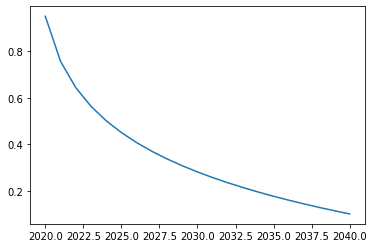

In [404]:
plt.plot(years21,[C1(t) for t in years21])

In [405]:
def plot(f):
    y_vals = [f(y) for y in years21]
    plt.plot(years21,y_vals)

In [406]:
def lh_need(t):
    """Lost long haul trucks at year t."""
    lh_need = full_prod.loc[t-5,'lh']
    return lh_need
    


In [407]:
def lh_prod(t):
    """Diesel long haul trucks produced to partially replenish need."""
    prod_lh = C1(t)*lh_need(t)
    return prod_lh
    
lh_prod(2020)

90980.55

In [408]:
# Filling predicted values for lh  
for t in range(2020,2041):
    nxt_val = lh_prod(t)
    full_prod.at[t,'lh'] = nxt_val



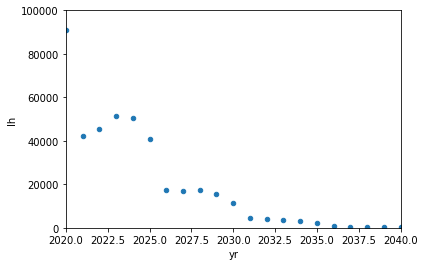

In [409]:
full_prod.plot(kind='scatter',x='yr',y='lh',xlim=(2020,2040),ylim=(0,100000))

In [410]:
# Lost r trucks - Gained r trucks. If r_prod is negative, add to r_tot at year t.
def r_prod(t):
    """Diesel r trucks produced. Lost regional trucks at year t => (Loss - Gain) = Need"""
    r_loss = full_prod.loc[t-12,'r']
    lh_loss = full_prod.loc[t-12,'lh']
    r_gain = lh_need(t)
    r_need = (r_loss + lh_loss) - r_gain
    if r_need <= 0:
        return 0
    else:
        r_prod = C1(t)*r_need
        
    # Enter current r_prod into current year t.
    full_prod.at[t,'r'] = r_prod
    return r_prod




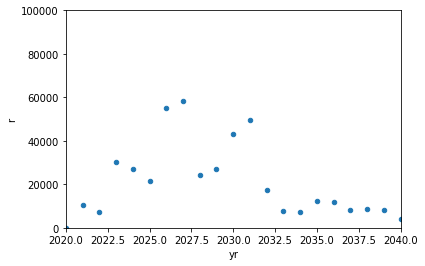

In [411]:
# Filling 'r' with projected values
for t in range(2020,2041):
    r_prod(t)

full_prod.plot(kind='scatter',x='yr',y='r',xlim=(2020,2040),ylim=(0,100000))

In [412]:
def el_lh_prod(t):
    """Electric long haul trucks produced in year t."""
    el_lh_prod = C(t)*lh_need(t)
    return el_lh_prod
    

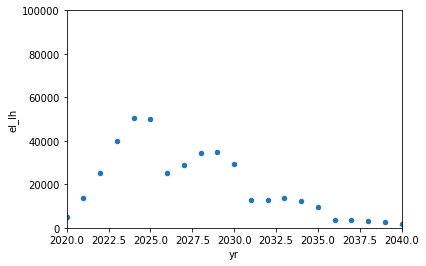

In [413]:
# Filling predicted values for el_lh  
for t in range(2020,2041):
    nxt_val = el_lh_prod(t)
    full_prod.at[t,'el_lh'] = nxt_val
    
full_prod.plot(kind='scatter',x='yr',y='el_lh',xlim=(2020,2040),ylim=(0,100000))

In [414]:
def el_r_prod(t):
    r_loss = full_prod.loc[t-12,'r']
    lh_loss = full_prod.loc[t-12,'lh']
    r_gain = lh_need(t)
    r_need = (r_loss + lh_loss) - r_gain
    if r_need <= 0:
        return 0
    else:
        el_r_prod = C(t)*r_need
        
    # Enter current r_prod into current year t.
    full_prod.at[t,'el_r'] = el_r_prod
    return el_r_prod



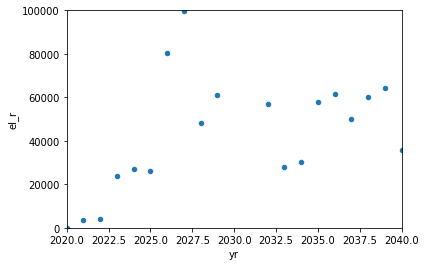

In [415]:
# Filling 'el_r' with projected values
for t in range(2020,2041):
    el_r_prod(t)

full_prod.plot(kind='scatter',x='yr',y='el_r',xlim=(2020,2040),ylim=(0,100000))

In [422]:
def lh_tot(t):
    """Calculate LH trucks at year t."""
    tot = full_prod.loc[t-4:t,'lh'].sum()
    return tot

lh_tot(2020)

410348

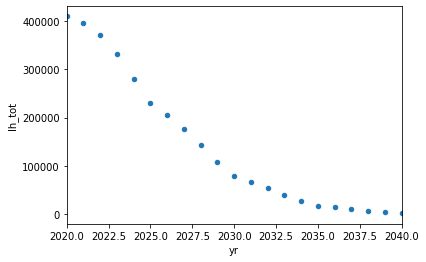

In [417]:
# Fill 'lh_tot' with projected values.
for t in range(2020,2041):
    nxt_val = lh_tot(t)
    full_prod.loc[t,'lh_tot'] = nxt_val
full_prod.plot(kind='scatter',x='yr',y='lh_tot',xlim=(2020,2040))

In [423]:
def r_tot(t):
    """Calculate R trucks at year t."""
    r_tot = full_prod.loc[t-11:t,'r'].sum()
    lh_tot = full_prod.loc[t-11:t-6,'lh'].sum()
    return r_tot + lh_tot
    
r_tot(2020)

1226149

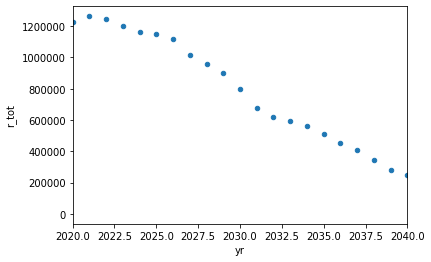

In [419]:
# Fill 'r_tot' with projected values.
for t in range(2020,2041):
    nxt_val = r_tot(t)
    full_prod.loc[t,'r_tot'] = nxt_val
full_prod.plot(kind='scatter',x='yr',y='r_tot',xlim=(2020,2040))

In [426]:
# Values for total diesel vehicles
full_prod['diesel_tot'] = full_prod['lh_tot'] + full_prod['r_tot']
full_prod

,yr,r,lh,el_r,el_lh,r_tot,lh_tot,el_r_tot,el_lh_tot,diesel_tot
yr,,,,,,,,,,
1999,1999,36910,180205,0,0,0,0,0,0,0
2000,2000,35211,105632,0,0,0,0,0,0,0
2001,2001,25124,48771,0,0,0,0,0,0,0
2002,2002,39794,62241,0,0,0,0,0,0,0
2003,2003,45652,60516,0,0,0,0,0,0,0
2004,2004,77035,77035,0,0,0,0,0,0,0
2005,2005,77893,112091,0,0,0,0,0,0,0
2006,2006,90008,114555,0,0,0,0,0,0,0
2007,2007,36878,48884,0,0,0,0,0,0,0


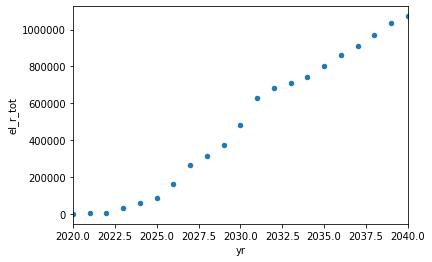

In [428]:
# Values for el_r_tot
def el_r_tot(t):
    tot = full_prod.loc[2020:t,'el_r'].sum()
    return tot

# Fill values for el_r_tot
for t in range(2020,2041):
    nxt_val = el_r_tot(t)
    full_prod.loc[t,'el_r_tot'] = nxt_val
full_prod.plot(kind='scatter',x='yr',y='el_r_tot',xlim=(2020,2040))

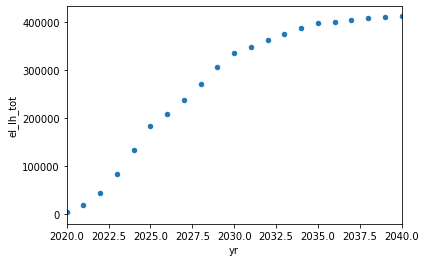

In [429]:
# Values for el_lh_tot
def el_lh_tot(t):
    tot = full_prod.loc[2020:t,'el_lh'].sum()
    return tot

# Fill values for el_r_tot
for t in range(2020,2041):
    nxt_val = el_lh_tot(t)
    full_prod.loc[t,'el_lh_tot'] = nxt_val
full_prod.plot(kind='scatter',x='yr',y='el_lh_tot',xlim=(2020,2040))

In [433]:
full_prod['el_tot']=0
full_prod['proportion']=0

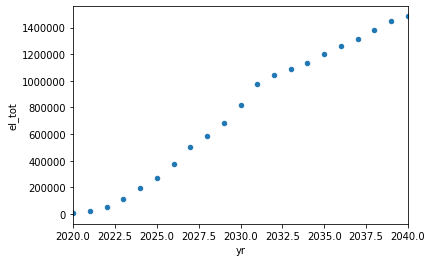

In [435]:
full_prod['el_tot'] = full_prod['el_lh_tot'] + full_prod['el_r_tot']
full_prod.plot(kind='scatter',x='yr',y='el_tot',xlim=(2020,2040))

In [448]:
full_prod['proportion']=(100*full_prod['el_tot'])/(full_prod['el_tot']+full_prod['diesel_tot'])


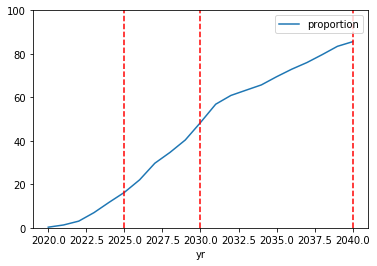

In [457]:
full_prod.plot(kind='line',x='yr',y='proportion',xlim=(2019,2041),ylim=(0,100))
full_prod.loc[[2020,2025,2030,2040],'proportion']
xposition = [2025,2030,2040]
for xc in xposition:
    plt.axvline(x=xc,color='r',linestyle='--')
plt.savefig('updated_percent_electric_semi')

In [456]:
full_prod.loc[[2020,2025,2030,2040],'proportion']

yr
2020     0.291723
2025    16.292744
2030    48.404159
2040    85.587969
Name: proportion, dtype: float64